# **CARGA DE TRAIN Y TEST**

In [21]:
import numpy as np
import pandas as pd

In [22]:
x_train=pd.read_excel('06-x_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('06-x_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('06-y_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('06-y_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)


# **BALANCEO DE DATOS**

In [23]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [24]:
overs = RandomOverSampler()

In [25]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [26]:
y_t_overs

,Emociones
0,0
1,3
2,3
3,3
4,0
...,...
571,2
572,2
573,2
574,2


# **NORMALIZACION DE CARACTERISTICAS**

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [28]:
x_train_std

array([[ 0.16, -0.6 ,  0.32, ..., -1.14, -0.67,  0.24],
       [-0.79, -0.82,  0.51, ...,  0.21,  0.61, -2.  ],
       [-0.71, -0.65,  0.43, ...,  0.21, -0.03, -1.04],
       ...,
       [-0.68, -0.45,  0.56, ..., -0.16, -0.35, -0.28],
       [-0.65, -0.83,  1.09, ..., -0.8 , -0.44,  0.22],
       [-0.64, -0.21,  0.72, ...,  0.32, -0.66,  0.33]])

In [29]:
y_t_overs

,Emociones
0,0
1,3
2,3
3,3
4,0
...,...
571,2
572,2
573,2
574,2


# **MODELO DE MARCHINE LEARNING**

In [30]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               13312     
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
18/18 [==============================] - 1s 6ms/step - loss: 1.1709 - accuracy: 0.4618
Epoch 2/800
18/18 [==============================] - 0s 5ms/step - loss: 0.9185 - accuracy: 0.6146
Epoch 3/800
18/18 [==============================] - 0s 5ms/step - loss: 0.7944 - accuracy: 0.6597
Epoch 4/800
18/18 [==============================] - 0s 5ms/step - loss: 0.7096 - accuracy: 0.6927
Epoch 5/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6204 - accuracy: 0.7587
Epoch 6/800
18/18 [==============================] - 0s 6ms/step - loss: 0.5568 - accuracy: 0.7795
Epoch 7/800
18/18 [==============================] - 0s 5ms/step - loss: 0.5121 - accuracy: 0.8160
Epoch 8/800
18/18 [==============================] - 0s 7ms/step - loss: 0.4597 - accuracy: 0.8438
Epoch 9/800
18/18 [==============================] - 0s 5ms/step - loss: 0.3941 - accuracy: 0.8698
Epoch 10/800
18/18 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.9010
Epoch 11/

array([0, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 3, 3, 1, 0, 0, 0, 2, 2, 1, 3, 1, 3, 3, 0, 0, 2, 3, 0,
       0, 0, 1, 3, 2, 2, 3, 0, 0, 1, 3, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1,
       1, 2, 3, 2, 1, 2, 3, 0, 1, 3, 3, 3, 2, 3, 0, 0, 2, 3, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 3, 1, 3, 1, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2,
       0, 1, 1, 3, 1, 2, 0, 3, 0, 3, 2, 1, 1])

# **EVALUACION**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.59      0.54      0.57        35
           2       0.53      0.59      0.56        17
           3       0.72      0.72      0.72        32

    accuracy                           0.69       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.69      0.69      0.69       123



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.59      0.54      0.57        35
           2       0.53      0.59      0.56        17
           3       0.72      0.72      0.72        32

    accuracy                           0.69       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.69      0.69      0.69       123

Matriz de confusión, sin normalización
[[33  4  1  1]
 [ 7 19  5  4]
 [ 0  3 10  4]
 [ 0  6  3 23]]


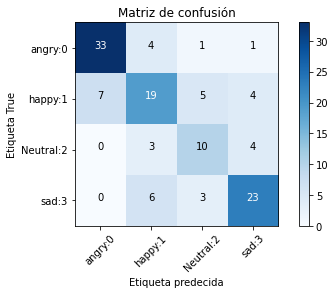

In [ ]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')

# **GUARDANDO MODELOS **

Normalizacion

In [ ]:
import joblib
joblib.dump(sc , '189_Normalizacion.pkl')

['189_Normalizacion.pkl']

Modelo entrenado

In [ ]:
import joblib
joblib.dump(clf , '189_Modelo_Prueba.pkl')

INFO:tensorflow:Assets written to: ram://d8c2e37b-105b-4e50-ba9c-385c6aa452af/assets


['189_Modelo_Prueba.pkl']